# KNN Programming Assignment

### by Joshua Rodriguez


Choose a unique dataset from: https://archive.ics.uci.edu <br>
Your dataset should be unique from your classmates otherwise no points will be given for this exercise. <br>
# Complete the Tasks in bold
## Data Exploration
### TASK: Create a correlation heatmap.

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

with open('Raisin_Dataset.arff', 'r', encoding='utf-8') as f:
    dataset = arff.load(f)
data = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])
df = data.dropna()
df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


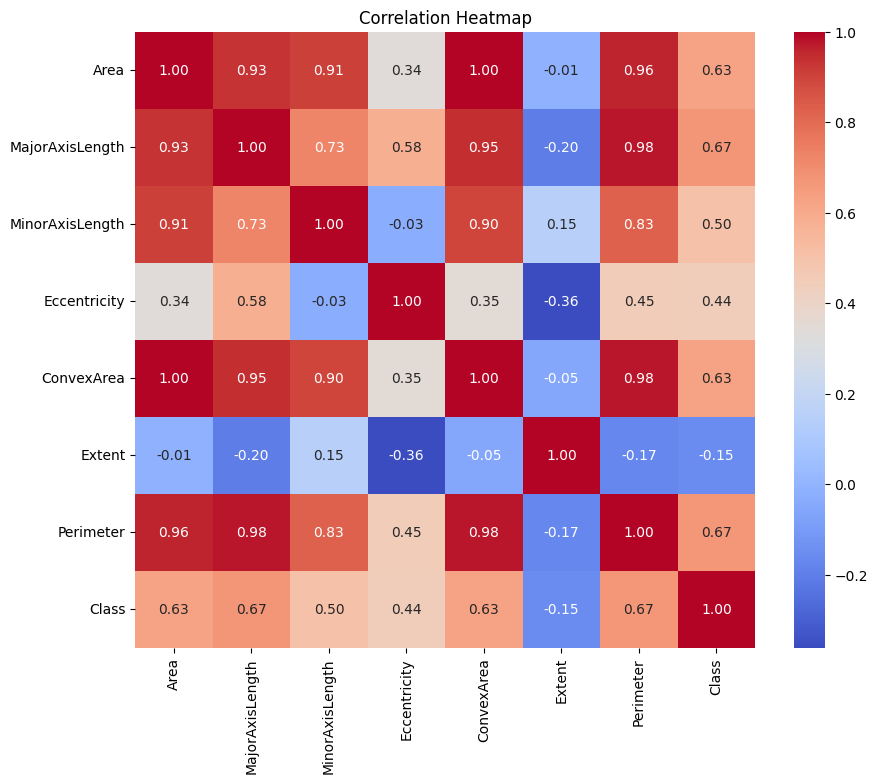

In [148]:
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## TASK: What are the top 5 correlated frequencies with the target\label?

Note: You many need to map the label to 0s and 1s.

Additional Note: We're looking for absolute correlation values.

In [131]:
correlation_with_target = data.corr()['Class'].abs().sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('Class')
top_correlated_features = correlation_with_target.head(5)

print("Top 5 correlated features with the target label:")
print(top_correlated_features)


Top 5 correlated features with the target label:
MajorAxisLength    0.673194
Perimeter          0.665981
Area               0.625715
ConvexArea         0.625567
MinorAxisLength    0.503102
Name: Class, dtype: float64


## Train | Test Split
Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.<br>
    **TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.** <br>
    *Note: Do not forget to put a random_state for reproducibility.*

In [140]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.1, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (729, 7)
Shape of X_val: (81, 7)
Shape of X_test: (90, 7)
Shape of y_train: (729,)
Shape of y_val: (81,)
Shape of y_test: (90,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [142]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())  
])

# Print the pipeline
print(pipeline)


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [138]:
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9]  # Test various values of k
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print("\nBest estimator:")
print(grid_search.best_estimator_)


Best parameters found:
{'knn__n_neighbors': 9}

Best estimator:
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

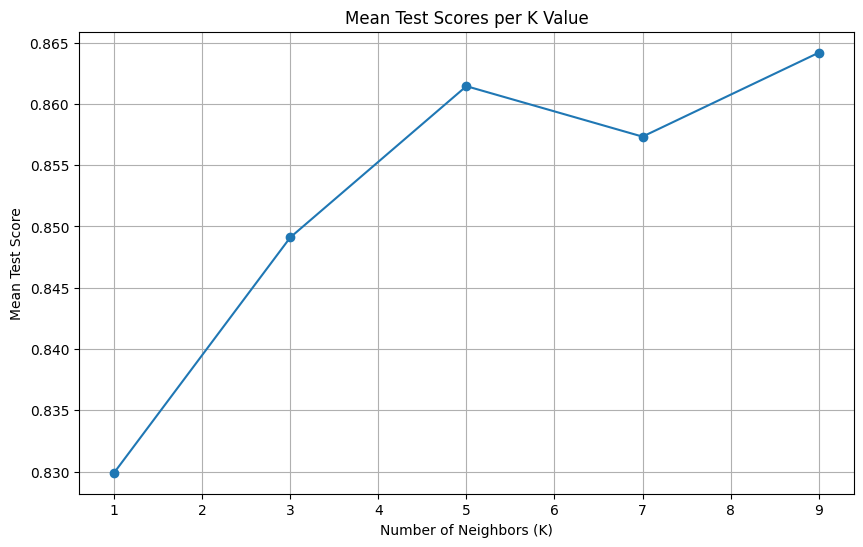

In [137]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['knn__n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores per K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()


## Final Model Evaluation
**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.** <br>
Recommended from GridSearch is K=9

In [145]:
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       Besni       0.80      0.79      0.80        42
     Kecimen       0.82      0.83      0.82        48

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90


Confusion Matrix:
[[33  9]
 [ 8 40]]
